# Linear Regression using Gradient Descent and the Normal Equations to Predict the Weather in London After WW2.

Yash Patel, Noah Meininger, David DeVore, Caleb Emerson, George Rauta, Akanksh Jain

    Our goal with this project was to collect London weather data from 1935 to 1956, and, considering that WW2 took place from 1939 to 1945, see the effects that the War had on the weather in London. 

    We considered multiple factors in our linear regression as we recognized the difference between a relationship that fits the data well and a relationship that fits the trends shown by the data well. The factors we chose included longitude,

    latitude, air pollution, and population. Of these factors, our biggest interests was air pollution. WW2 had a large impact even after it ended due to its role in industrial expansion and the effects it had on the air quality (e.g: The Great Smog of London).

#### Resources

    Air-Pollution Data: https://ourworldindata.org/london-air-pollution
    
    Weather Data: https://digital.nmla.metoffice.gov.uk/index.php?name=SO_86058de1-8d55-4bc5-8305-5698d0bd7e13

    Population: https://tasks.illustrativemathematics.org/content-standards/tasks/1595

    Compiled Data on London: https://docs.google.com/spreadsheets/d/1cAUXhY3yODRw_qezb44WnIjhVe72IsirT_6N3nhgIYE/edit?                              usp=sharing

    Cross Validation@: https://www.geeksforgeeks.org/cross-validation-machine-learning/

    The Great Smog of London: https://www.britannica.com/event/Great-Smog-of-London

#### Normal Equation Model

    [latitude | longitude |  air pollution |  population] [X3 ; X4] = [T(1946-T1936) | T(1956-T1946)]

    We're using the normal equation model because it represents our linear system. By finding X3 and X4, we are solving for the coeffecients we need. In addition, we don't need a learning rate or need to worry about feature scaling as the normal equation is not an iterative algorithm. Since there are only a small number of features that we are working with, it helps compute the inverse. 

##### Gradient Descent Model

    ∇𝜙(𝐱)=2𝐉(𝐱)^(𝑇)𝐟(𝐱)

    Gradient descent is another method of solving a system of linear equations. Unlike our normal equations, gradient descent is an iterative optimization algorithm that is best suited for problems with many features.

#### Our Data


In [ ]:
londonLat = 51.072;
londonLong = 0.1276;
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
airPollution1946 = [272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68]
population1935 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
population1946 = [7840400, 7860200, 7879500, 7898300, 7916600, 7934400, 7951800, 7968700, 7985200, 8001200, 8016800]
avgMaxTemp1936_1946 = [57.675, 56.775, 57.525, 57.525, 55.275, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525]
avgMinTemp1936_1946 = [44.95, 45.05, 46.3, 45.05, 44.925, 45.05, 45.05, 45.4, 45.05, 45.05, 45.05]
avgMaxTemp1946_1956 = [57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.25, 57.25, 57.25, 66]
avgMinTemp1946_1956 = [45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.225, 45.225, 40.225, 54]

#### Comparing Gradient Descent and the Normal Equation


    1935:1946 - Pollution

1232.8038661784285
33.90736930758174
1.12971526584594
0.23325946301319533
0.20842304133505524
0.20741719037712458
0.2070637193240072
0.20672894393960528
0.20639553729588506
0.20606302341966412
0.20573138704172633
0.20540062549425542
0.20507073645989454
0.20474171763678373
0.20441356672939343
0.2040862814482573
0.20375985950994638
0.2034342986370577
0.20310959655819483
0.20278575100795262
0.20246275972690425
0.20214062046157438
0.2018193309644456
0.20149888899391832
0.20117929231431156
0.2008605386958402
0.20054262591459937
0.20022555175255485
0.19990931399751705
0.19959391044313896
0.19927933888889107
0.1989655971400417
0.19865268300766303
0.1983405943085871
0.19802932886541397
0.1977188845064845
0.19740925906586607
0.1971004503833418
0.19679245630439537
0.19648527468018986
0.19617890336755697
0.1958733402289876
0.19556858313260095
0.1952646299521516
0.19496147856699353
0.19465912686207865
0.19435757272793888
0.19405681406066877
0.1937568487619123
0.19345767473885328
0.1931592899041898

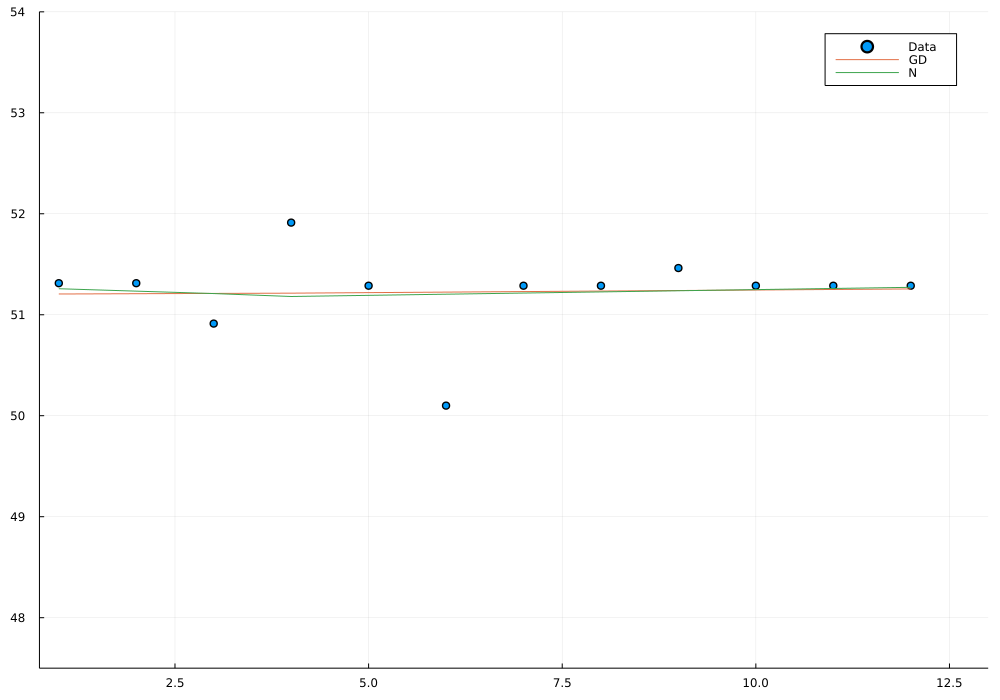

In [74]:
using FundamentalsNumericalComputation
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

function normalizeData(v)
    return (v .- mean(v)) / std(v);
end

bias = ones(12)
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935_1946 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

years1935 = normalize(years1935)
airPollution1935_1946 = normalize(airPollution1935_1946)

X = [bias'; years1935'; airPollution1935_1946']
X = X'

y = avgTemp1935_1946;
result = gradientDescent(X, y, 1, false, 5000);
f(year, pollution) = result[1] .+ result[2] * year + result[3] * pollution

resultN = X \ y;
fN(year, pollution) = resultN[1] .+ resultN[2] * year + resultN[3] * pollution

scatter(y, xlims = (0.75, 13), ylims = (47.5, 54), labels="Data")
plot!(f(years1935, airPollution1935_1946), labels="GD")
plot!(fN(years1935, airPollution1935_1946), labels="N")
plot!(size=(1000,700))

    1935:1946 - Population

1232.6809303376858
34.316518936319525
1.031931940977881
0.10745209730673629
0.0817746471983429
0.08106144516531202
0.08104162544477035
0.08104106442707851
0.08104103832028026
0.08104102707081368
0.08104101623418455
0.0810410054091964
0.08104099458470666
0.08104098376040436
0.08104097293628232
0.08104096211233978
0.08104095128857676
0.081040940464993
0.08104092964158945
0.08104091881836419
0.0810409079953198
0.08104089717245384
0.08104088634976839
0.08104087552726173
0.08104086470493521
0.08104085388278803
0.08104084306081952
0.08104083223903188
0.08104082141742243
0.0810408105959931
0.08104079977474327
0.08104078895367245
0.08104077813278171
0.08104076731207005
0.08104075649153865
0.08104074567118598
0.08104073485101332
0.08104072403101967
0.08104071321120576
0.08104070239157007
0.0810406915721158
0.08104068075284035
0.08104066993374348
0.08104065911482627
0.08104064829608865
0.08104063747753128
0.08104062665915254
0.08104061584095423
0.08104060502293445
0.08104059420509352
0.081040583

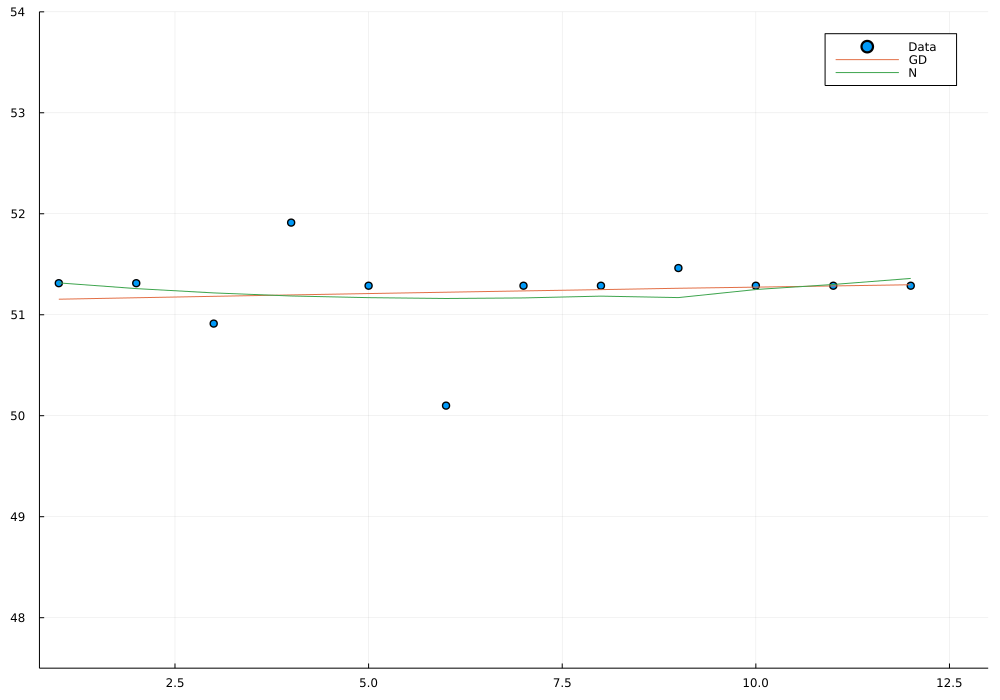

In [72]:
using FundamentalsNumericalComputation
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

bias = ones(12)
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
population1935_1946 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

years1935 = normalize(years1935)
normPopulation1935_1946 = normalize(population1935_1946)

X = [bias'; years1935'; normPopulation1935_1946'];
X = X';

y = avgTemp1935_1946;
result = gradientDescent(X, y, 1, false, 5000);
f(year, population) = result[1] .+ result[2] * year + result[3] * population

resultN = X \ y;
fN(year, population) = resultN[1] .+ resultN[2] * year + resultN[3] * population

scatter(y, xlims = (0.75, 13), ylims = (47.5, 54), labels="Data")
plot!(f(years1935, normPopulation1935_1946), labels="GD")
plot!(fN(years1935, normPopulation1935_1946), labels="N")
plot!(size=(1000,700))

    1945:1956 - Pollution

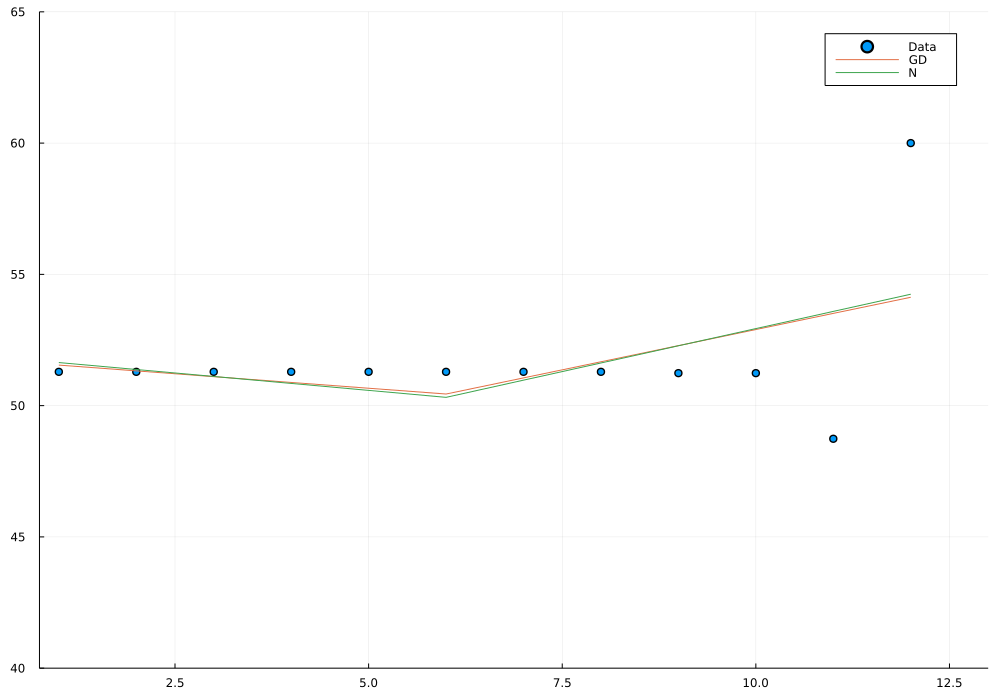

In [52]:
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

function normalizeData(v)
    return (v .- mean(v)) / std(v);
end

bias = ones(12)
year1945_1956 = [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956];
airPollution1945_1956 = [288.64, 272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68];
avgTemp1945_1956 = [51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2375, 51.2375, 48.7375, 60];

year1945_1956 = normalizeData(year1945_1956)
airPollution1945_1956 = normalizeData(airPollution1945_1956)

X = [bias'; year1945_1956'; airPollution1945_1956'];
X = X';

y = avgTemp1945_1956;
resultGD = gradientDescent(X, y, 1, false, 50);
fGD(year, pollution) = resultGD[1] .+ resultGD[2] * year + resultGD[3] * pollution

resultN = X \ y;
fN(year, pollution) = resultN[1] .+ resultN[2] * year + resultN[3] * pollution

scatter(y, xlims = (0.75,13), ylims = (40,65), labels="Data")
plot!(fGD(year1945_1956, airPollution1945_1956), labels="GD")
plot!(fN(year1945_1956, airPollution1945_1956), labels="N")
plot!(size=(1000,700))


    1945:1956 - Population


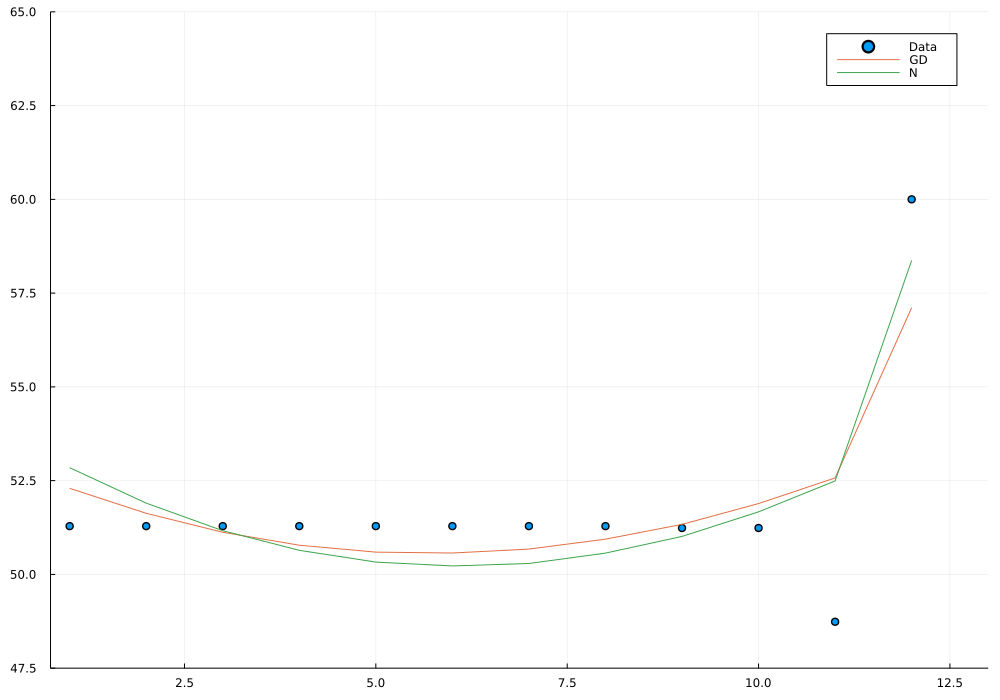

In [75]:
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

bias = ones(12)
year1945_1956 = [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956];
population1946 = [7840400, 7860200, 7879500, 7898300, 7916600, 7934400, 7951800, 7968700, 7985200, 8001200, 8016800, 8020400]
avgTemp1945_1956 = [51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2375, 51.2375, 48.7375, 60];

year1945_1956 = normalizeData(year1945_1956)
population1946 = normalizeData(population1946)

X = [bias'; year1945_1956'; population1946'];
X = X';

y = avgTemp1945_1956;
resultGD = gradientDescent(X, y, 1, false, 500)
fGD(year, population) = resultGD[1] .+ resultGD[2] * year + resultGD[3] * population

resultN = X \ y;
fN(year, population) = resultN[1] .+ resultN[2] * year + resultN[3] * population

scatter(y, xlims = (0.75, 13), ylims = (47.5, 65), labels="Data")
plot!(fGD(year1945_1956, population1946), labels="GD")
plot!(fN(year1945_1956, population1946), labels="N")
plot!(size=(1000,700))

Error Analysis

    Flop Count Analysis

    Gradient Descent
    1. Compute X * Theta -> (n x d)(d x 1) ~ 2nd - n
    2. Compute alpha / m * X' ~ nd + 1
    3. Compute X * Theta - y ~ n
    4. Compute (alpha / m * X') * (X * Theta - y) -> (d x n)(n x 1) ~ 2nd - d
    5. Compute Theta - (alpha / m * X') * (X * Theta - y) ~ d
    6. Repeat the process for k interations

    Together there are approximately 5knd + k flops.

    Clearly the knd term dominates and so all together, 
    Gradient Descent will be ~O(knd).


    Normal Equations
    1. Compute X'X -> (d x n)(n x d) ~ 2(n-1)d^2
    2. Compute X'y -> (d x n)(n x 1) ~ 2(n-1)d
    3. Solve system X'X * theta = X'y using Cholskey ~ O(1/3 * d^3)

    Together there are approximately 2(n-1)d^2 + 2(n-1)d + O(1/3 * d^3) flops.

    since usually n >> d, 2(n-1)d^2 term dominates and so all together, 
    So Normal Equations are ~O(nd^2).

    Scaling Analysis

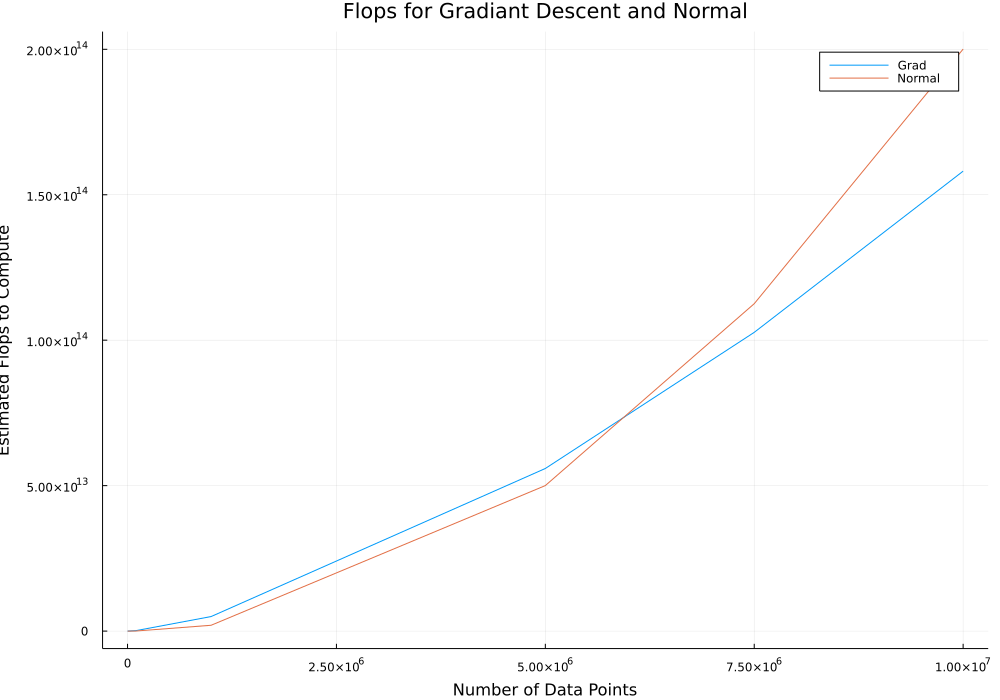

In [64]:
using Plots

vals = [1000, 10000, 100000, 1000000, 5000000, 7500000, 10000000]
k = 1000

gradTime = []
normTime = []
for n in vals
  d = sqrt(n)
  push!(gradTime, (5 * k * n * d + k))
  push!(normTime, (2*(n-1)*d^2 + 2*(n-1)*d + 1/3 * d^3))

end
plot(vals, gradTime, labels= "Grad", title = "Flops for Gradiant Descent and Normal", xlabel = "Number of Data Points", ylabel = "Estimated Flops to Compute")
plot!(vals, labels= "Normal", normTime)
plot!(size=(1000,700))

    Cross Validation

In [ ]:
function predict(coeffs, x)
  return y=coeffs[1]*x[1] + coeffs[2]*x[2] + coeffs[3]*x[3]
end

function cost(x, y, θ)
  m = size(x)[1]
  loss = x * θ - y
  return (1/2length(y)) * loss' * loss
end

function normalizeData(v)
    return (v .- mean(v)) / std(v);
end

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
    n = size(x)[2]
    θ = ones(n)
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
end

function crossValidation(X, Y)
  normalResiduals = []
  gradientResiduals = []
  alpha = 0.5
  numberOfIterations = 5000

  for i in 1:12
    trainingSetX = vcat(X[1:i - 1, :], X[i+1: end, :])
    trainingSetY = vcat(Y[1:i - 1], Y[i + 1:end])
    Xnorm = normalizeData(trainingSetX)

    normalCoeffs = trainingSetX\trainingSetY
    yHatNormal = predict(normalCoeffs, X[i,:])
    push!(normalResiduals, (yHatNormal-Y[i])^2)

    gradientCoeffs = gradientDescent(Xnorm, trainingSetY, alpha, false, numberOfIterations)
    yHatGradient = predict(gradientCoeffs, (X[i,:] .- mean(trainingSetX))/std(trainingSetX))
    push!(gradientResiduals, (yHatGradient-Y[i])^2)
  end

  normalAvgResidual = mean(normalResiduals)
  gradientAvgResidual = mean(gradientResiduals)

  println(string("Average Residual for Normal Equations:", normalAvgResidual))
  println(string("Average Residual for Gradient Descent:", gradientAvgResidual))

  x = 1:12
  scatter(x, gradientResiduals, title = "Squared Residuals from Cross-Validation",
  xlabel = "nth Excluded data point", ylabel = "Squared Residual for nth Model", labels = "GD")
  scatter!(x, normalResiduals, labels = "N")


end

bias = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
years1945 = [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956]
airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
airPollution1945 = [288.64, 272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68]
population1935 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
population1945 = [7820100, 7840400, 7860200, 7879500, 7898300, 7916600, 7934400, 7951800, 7968700, 7985200, 8001200, 8016800]
avgTemp1935 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]
avgTemp1945 = [51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2375, 51.2375, 48.7375, 60]

Conducting Cross-Validation for Pollution Data for Years 1935-1946

Average Residual for Normal Equations:0.26553076288481164
Average Residual for Gradient Descent:0.20845005625658017


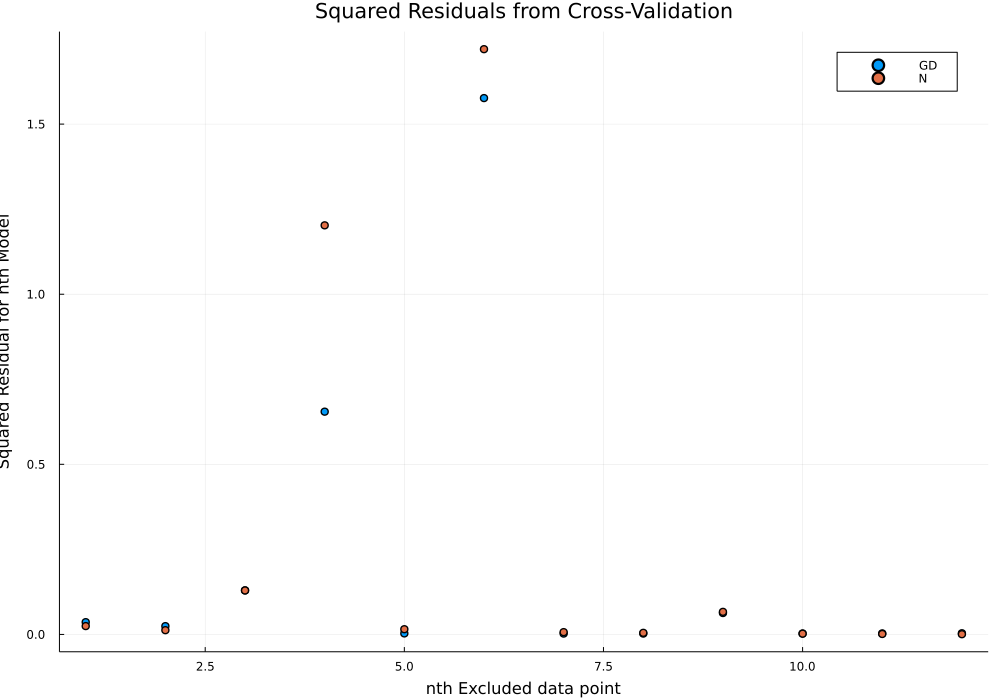

In [66]:
X = hcat(bias, years1935, airPollution1935)
y = avgTemp1935;
crossValidation(X, y)
plot!(size=(1000,700))

Conducting Cross-Validation for Pollution Data for Years 1945-1956

Average Residual for Normal Equations:13.543535996577758
Average Residual for Gradient Descent:9.139140061516775


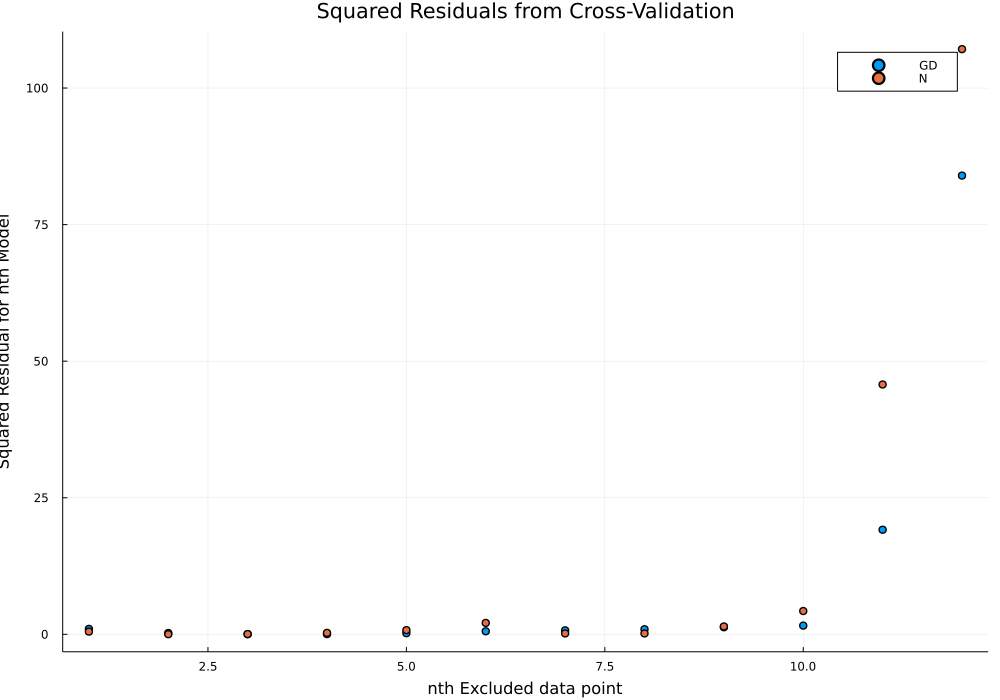

In [67]:
X = hcat(bias, years1945, airPollution1945)
y = avgTemp1945;
crossValidation(X, y)
plot!(size=(1000,700))

Conducting Cross-Validation for Population Data for Years 1935-1946

Average Residual for Normal Equations:0.22826579480472597
Average Residual for Gradient Descent:0.36653422824193865


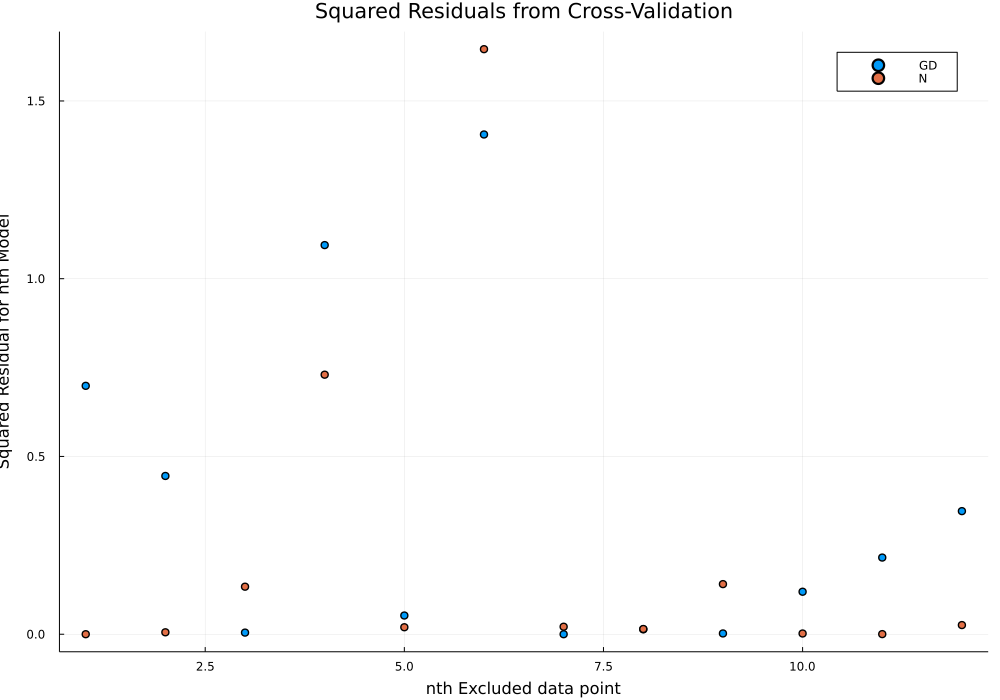

In [68]:
X = hcat(bias, years1935, population1935)
y = avgTemp1935;
crossValidation(X, y)
plot!(size=(1000,700))

Conducting Cross-Validation for Population Data for Years 1945-1956

Average Residual for Normal Equations:14.809303160586941
Average Residual for Gradient Descent:7.81979006806107


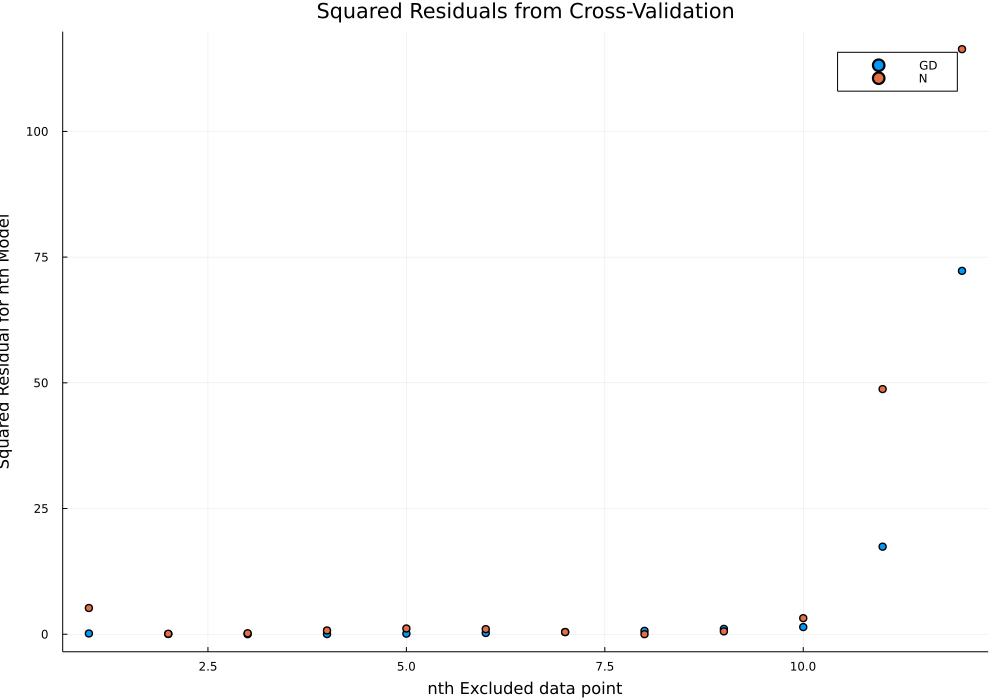

In [69]:
X = hcat(bias, years1945, population1945)
y = avgTemp1945;
crossValidation(X, y)
plot!(size=(1000,700))

Application to Our Overall Problem

    We noticed that Gradient Descent was very valuable for, however obviously, re-adjusting when there are large deviances in the data.

    Furthermore, we noticed that air pollution was a better predictor before WW2, and population was a better predictor after WW2. This says a lot more about air pollution than it does for population. More specifically, this shows how much London's recovery from WW2 affected the air quality. 

Gradient-Descent vs. The Normal Equation

    The Normal Equations and Gradient-Descent both provided us with four accurate predictions corresponding to the relationsip between pollution and population and the weather in each of the two time frames (reference plots above). Any lapse in accuracy can be due more to needing more features to explain the data.

    However, considering that the normal equation has a higher flop count when you scale the problem as well as less accuracy and more error, it is much less valuable for linear regression. Gradient-Descent should be preferred over the normal equation, especially when you are dealing with large amounts of data and features.